In [59]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time

spotify_data = pd.read_csv('spotify_dataset.csv')

spotify_data.sample(20)

Unnamed: 0                track_id  \
48947        48947  1UJK0babSL6f8K1Vd3XETP   
82220        82220  32uXfxJERzv4RK1gMLXbOA   
99126        99126  3Dz8VohgvbYkf6OS99H0vT   
50553        50553  1dFYQGVJrfGlwo7aJ5EWIS   
86606        86606  00okrW9OfjmG0PZJSY3fJd   
42688        42688  1VTg9yhCYcRgl4wAunK9RE   
44540        44540  0Q75bkIyDFzLQzI966JE4J   
27198        27198  4lW5f7Yr9E7EIYZ8RT3rIV   
105284      105284  4MQNfN5ZBezTVLDr8Y6o1m   
108486      108486  2OKST9YTWMleTr5SAdbaEG   
60622        60622  2VWeZ0zqoCSYNPfj3HfpuW   
101004      101004  6kOJ0Ylenwr6Up0g4lDORg   
111234      111234  2FH3BLTMhJlCH1Dmkua5DW   
13401        13401  06hANyT8h4lWypiU6PJPrR   
112651      112651  2SwQShWjZsxoGviEyaEMOX   
14094        14094  0Lc5P4cawqvzWjtNCOKsWK   
102935      102935  3tstzyYuJkzEta9X7vgXXp   
66085        66085  5YRzeFvIc4yNhpzDcLKWvE   
23916        23916  5gnXJhg3zGHWvrgplrVrxH   
16783        16783  1KHk7GFwXIMW2yUvTkjCKQ   

                                                  artists  \
48947                                      BBS Paranoicos   
82220                                  Fountains Of Wayne   
99126                                         Bryan Adams   
50553                                        Los Antiguos   
86606               MOD SUN;Machine Gun Kelly;Goody Grace   
42688                                 Cattle Decapitation   
44540                                         Blind Melon   
27198                          Chase & Status;CeeLo Green   
105284                        Sarah, the Illstrumentalist   
108486                           Miguel Calo;Raul Iriarte   
60622                                         Vybz Kartel   
101004                             White Noise for Babies   
111234       Faithless;Rollo Armstrong;Sister Bliss;Goetz   
13401                                         Larry Heard   
112651                                              Ezhel   
14094                                  The Countdown Kids   
102935                                       Catie Turner   
66085                             BadKidMacei;Badkidparis   
23916                          Joe Stone;Four of Diamonds   
16783   Wolfgang Amadeus Mozart;Heinz Holliger;Hermann...   

                                               album_name  \
48947                                        Algo No Anda   
82220                                  Fountains of Wayne   
99126                                     Weihnachtssongs   
50553                                  Oro Para las Naves   
86606   Stay Away (feat. Machine Gun Kelly & Goody Grace)   
42688                  Homovore (2021 Remastered Version)   
44540                                                Soup   
27198                    No More Idols (Platinum Edition)   
105284                     Pocket Full of Crystals: Vol 2   
108486                                       Fruta Amarga   
60622                                       Gone Too Soon   
101004                                         Rising Sun   
111234                                      Faithless 2.0   
13401                       Charles Webster - Coast2Coast   
112651                                           Nerdesin   
14094                       Halloween Movie & TV Classics   
102935                          Give You Love - Cozy Hits   
66085                                               Bossy   
23916                                           Superstar   
16783                           Mozart - A Classical Dawn   

                                               track_name  popularity  \
48947                                      Calla y Espera          31   
82220                                  Sink to the Bottom          50   
99126                                      Christmas Time           0   
50553                                No te lo puedo decir          22   
86606   Stay Away (feat. Machine Gun Kelly & Goody Grace)          61   
42688   Open Human Head Experiments wit

In [60]:
spotify_data = spotify_data.drop(columns=['Unnamed: 0'])

Get shape of dataset (number of rows and cols)

In [61]:
spotify_data.shape

(114000, 20)

Get a summary of numeric columns

Observations:
- The min duration_ms of a song is ~0ms, which may be strange. Possible future to-do: remove songs that are 0ms long

In [62]:
spotify_data.select_dtypes('number').describe()

popularity   duration_ms   danceability         energy  \
count  114000.000000  1.140000e+05  114000.000000  114000.000000   
mean       33.238535  2.280292e+05       0.566800       0.641383   
std        22.305078  1.072977e+05       0.173542       0.251529   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%        17.000000  1.740660e+05       0.456000       0.472000   
50%        35.000000  2.129060e+05       0.580000       0.685000   
75%        50.000000  2.615060e+05       0.695000       0.854000   
max       100.000000  5.237295e+06       0.985000       1.000000   

                 key       loudness           mode    speechiness  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        5.309140      -8.258960       0.637553       0.084652   
std         3.559987       5.029337       0.480709       0.105732   
min         0.000000     -49.531000       0.000000       0.000000   
25%         2.000000     -10.013000       0.000000       0.035900   
50%         5.000000      -7.004000       1.000000       0.048900   
75%         8.000000      -5.003000       1.000000       0.084500   
max        11.000000       4.532000       1.000000       0.965000   

        acousticness  instrumentalness       liveness        valence  \
count  114000.000000     114000.000000  114000.000000  114000.000000   
mean        0.314910          0.156050       0.213553       0.474068   
std         0.332523          0.309555       0.190378       0.259261   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.016900          0.000000       0.098000       0.260000   
50%         0.169000          0.000042       0.132000       0.464000   
75%         0.598000          0.049000       0.273000       0.683000   
max         0.996000          1.000000       1.000000       0.995000   

               tempo  time_signature  
count  114000.000000   114000.000000  
mean      122.147837        3.904035  
std        29.978197        0.432621  
min         0.000000        0.000000  
25%        99.218750        4.000000  
50%       122.017000        4.000000  
75%       140.071000        4.000000  
max       243.372000        5.000000

Find any duplicate rows from the dataset

In [63]:
duplicate_mask = spotify_data.duplicated(keep=False)

# Filter the dataframe to show only the duplicate rows
duplicate_rows = spotify_data[duplicate_mask]

# Get the count of completely duplicate rows
num_duplicates = len(duplicate_rows)
print(f"Number of rows that are duplicates/Number of total rows: {num_duplicates}/{spotify_data.shape[0]}")

# Sort the duplicate rows by all columns to group identical rows together
duplicate_rows_sorted = duplicate_rows.sort_values(spotify_data.columns.tolist())

duplicate_rows_sorted

Number of rows that are duplicates/Number of total rows: 894/114000


track_id  \
52714  00JZ83w0Qm09f4PwWj06sM   
52766  00JZ83w0Qm09f4PwWj06sM   
39275  02KmEChUwcjxG3G29kbLFT   
39307  02KmEChUwcjxG3G29kbLFT   
93331  02MRylJ1WAgxzdqfNfdIsR   
...                       ...   
52570  7zBY3YjvcdkpbHIUx0fe5Q   
93290  7zkgAyL3DS6PE5FWzk3QKM   
93328  7zkgAyL3DS6PE5FWzk3QKM   
16719  7zo05whm8LBnnt1dG979ov   
16919  7zo05whm8LBnnt1dG979ov   

                                                 artists  \
52714                                       George Jones   
52766                                       George Jones   
39275  Hans Zimmer;Henning Lohner;Martin Tillman;Fiac...   
39307  Hans Zimmer;Henning Lohner;Martin Tillman;Fiac...   
93331                                       Oleg Pogudin   
...                                                  ...   
52570                                      Hank Williams   
93290                                   Vladimir Nechaev   
93328                                   Vladimir Nechaev   
16719  Wolfgang Amadeus Mozart;Wiener Mozart Ensemble...   
16919  Wolfgang Amadeus Mozart;Wiener Mozart Ensemble...   

                                              album_name  \
52714                                          With Love   
52766                                          With Love   
39275                           Hans Zimmer: Epic Scores   
39307                           Hans Zimmer: Epic Scores   
93331              Любовь и разлука. Песни Исаака Шварца   
...                                                  ...   
52570  Hank Williams As Luke The Drifter (Expanded Ed...   
93290            Душевные песни из советских кинофильмов   
93328            Душевные песни из советских кинофильмов   
16719                          Mozart - A Classical Dawn   
16919                          Mozart - A Classical Dawn   

                                            track_name  popularity  \
52714                        A Good Year For The Roses          12   
52766                        A Good Year For The Roses          12   
39275                                 Shelter Mountain          16   
39307                                 Shelter Mountain          16   
93331                       Город пышный, город бедный           0   
...                                                ...         ...   
52570                                Everything's Okay          12   
93290          Ты рядом со мной - Из к/ф "Наши соседи"           1   
93328          Ты рядом со мной - Из к/ф "Наши соседи"           1   
16719  Six German Dances, K.571: No. 5 in B Flat Major           3   
16919  Six German Dances, K.571: No. 5 in B Flat Major           3   

       duration_ms  explicit  danceability  energy  key  loudness  mode  \
52714       190546     False         0.491   0.334   11    -9.684     1   
52766       190546     False         0.491   0.334   11    -9.684     1   
39275       250520     False         0.144   0.262    9   -21.228     1   
39307       250520     False         0.144   0.262    9   -21.228     1   
93331       114600     False         0.446   0.121    4   -12.737     0   
...            ...       ...           ...     ...  ...       ...   ...   
52570       172026     False         0.607   0.378    7   -13.581     1   
93290       207438     False         0.336   0.315    2   -10.006     0   
93328       207438     False         0.336   0.315    2   -10.006     0   
16719        92000     False         0.539   0.158   10   -15.544     1   
16919        92000     False         0.539   0.158   10   -15.544     1   

       speechiness  acousticness  instrumentalness  liveness  valence  \
52714       0.0287         0.659          0.000016    0.1160   0.2490   
52766       0.0287         0.659          0.000016    0.1160   0.2490   
39275       0.0641         0.876          0.755000    0.1440   0.0345   
39307       0.0641         0.876          0.755000    0.1440   0.0345   
93331       0.0414         0.937          0.000000    0.1250   0.1800   
..

Drop duplicate rows

In [64]:
spotify_data_unique = spotify_data.drop_duplicates()

num_unique = len(spotify_data_unique)
print(f"Number of unique rows: {num_unique}")

Number of unique rows: 113550


Check if `track_id` is a unique identifier column for the dataset

In [65]:
duplicate_mask = spotify_data_unique['track_id'].duplicated(keep=False)

# Filter the dataframe to show only rows with duplicate track_ids
duplicate_rows = spotify_data_unique[duplicate_mask]

# Sort the result by track_id to group duplicates together
duplicate_rows_sorted = duplicate_rows.sort_values('track_id')

# Get the count of duplicate rows
print(f"Number of rows with duplicate track_ids: {len(duplicate_rows)}")
duplicate_rows_sorted

Number of rows with duplicate track_ids: 40108


track_id            artists  \
15028   001APMDOl3qtx1526T11n1  Pink Sweat$;Kirby   
103211  001APMDOl3qtx1526T11n1  Pink Sweat$;Kirby   
85578   001YQlnDSduXd5LgBd66gT        Soda Stereo   
100420  001YQlnDSduXd5LgBd66gT        Soda Stereo   
2106    003vvx7Niy0yvhvHt4a68B        The Killers   
...                        ...                ...   
22326   7zv2vmZq8OjS54BxFzI2wM             Attila   
72679   7zv2vmZq8OjS54BxFzI2wM             Attila   
3100    7zwn1eykZtZ5LODrf7c0tS  The Neighbourhood   
2004    7zwn1eykZtZ5LODrf7c0tS  The Neighbourhood   
91401   7zwn1eykZtZ5LODrf7c0tS  The Neighbourhood   

                                             album_name  \
15028                                           New RnB   
103211                                          New RnB   
85578                          Soda Stereo (Remastered)   
100420                         Soda Stereo (Remastered)   
2106                                           Hot Fuss   
...                                                 ...   
22326                     Soundtrack to a Party (Bonus)   
72679                     Soundtrack to a Party (Bonus)   
3100    Hard To Imagine The Neighbourhood Ever Changing   
2004    Hard To Imagine The Neighbourhood Ever Changing   
91401   Hard To Imagine The Neighbourhood Ever Changing   

                                      track_name  popularity  duration_ms  \
15028                                     Better           0       176320   
103211                                    Better           0       176320   
85578   El Tiempo Es Dinero - Remasterizado 2007          38       177266   
100420  El Tiempo Es Dinero - Remasterizado 2007          38       177266   
2106                              Mr. Brightside          86       222973   
...                                          ...         ...          ...   
22326                       Lets Start the Party          25       125859   
72679                       Lets Start the Party          25       125859   
3100                          You Get Me So High          83       153000   
2004                          You Get Me So High          83       153000   
91401                         You Get Me So High          83       153000   

        explicit  danceability  energy  key  loudness  mode  speechiness  \
15028      False         0.613   0.471    1    -6.644     0       0.1070   
103211     False         0.613   0.471    1    -6.644     0       0.1070   
85578      False         0.554   0.921    2    -4.589     1       0.0758   
100420     False         0.554   0.921    2    -4.589     1       0.0758   
2106       False         0.352   0.911    1    -5.230     1       0.0747   
...          ...           ...     ...  ...       ...   ...          ...   
22326       True         0.592   0.932    1    -5.412     1       0.0558   
72679       True         0.592   0.932    1    -5.412     1       0.0558   
3100       False         0.551   0.881    7    -6.099     0       0.0542   
2004       False         0.551   0.881    7    -6.099     0       0.0542   
91401      False         0.551   0.881    7    -6.099     0       0.0542   

        acousticness  instrumentalness  liveness  valence    tempo  \
15028       0.316000          0.000001    0.1170    0.406  143.064   
103211      0.316000          0.000001    0.1170    0.406  143.064   
85578       0.019400          0.088100    0.3290    0.700  183.571   
100420      0.019400          0.088100    0.3290    0.700  183.571   
2106        0.001210          0.000000    0.0995    0.236  148.033   
...              ...               ...       ...      ...      ...   
22326       0.000005          0.859000    0.0730    0.677  133.987   
72679       0.000005          0.859000    0.0730    0.677  133.987   
3100        0.186000          0.079100    0.1520    0.387   88.036   
2004        0.186000          0.079100    0.1520    0.387   88.036   
91401       0.186000          0.079100    0.1520    0.387   88.036  

`track_id` has some duplicates. We can verify this by seeing if there are more rows than unique `track_ids`

In [66]:
unique_track_ids = spotify_data_unique["track_id"].unique()
rows_unique_track_id_ratio = spotify_data_unique.shape[0]/len(unique_track_ids)

print(f"Number of rows: {spotify_data_unique.shape[0]}")
print(f"Number of unique track ids: {len(unique_track_ids)}")
print(f"Number of rows divided by number of unique track ids: {rows_unique_track_id_ratio}")

Number of rows: 113550
Number of unique track ids: 89741
Number of rows divided by number of unique track ids: 1.2653079417434618


Observations:
- The rows with the same `track_id` have identical entries, except the `track_genre` column at the end.
- Since `track_id` is not a unique identifier we can combine `track_id` and `track_genre`, separated by ":" to form a unique identifier called `unique_id` (e.g. `7zwn1eykZtZ5LODrf7c0tS:rock`)

In [67]:
spotify_data_unique['unique_id'] = spotify_data_unique['track_id'] + ':' + spotify_data_unique['track_genre']

<ipython-input-67-a474d2b387ca>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Now check for any duplicates in `unique_id`. Ideally, there should be none.

In [68]:
# Check if number of rows equals number of unique_id entries
unique_ids = spotify_data_unique["unique_id"].unique()
rows_unique_id_ratio = spotify_data_unique.shape[0]/len(unique_ids)

print(f"Number of rows: {spotify_data_unique.shape[0]}")
print(f"Number of unique ids: {len(unique_ids)}")
print(f"Number of rows divided by number of unique ids: {rows_unique_id_ratio}")


# Check for any duplicate unique ids
duplicate_mask = spotify_data_unique['unique_id'].duplicated(keep=False)
duplicate_rows = spotify_data_unique[duplicate_mask]
duplicate_rows_sorted = duplicate_rows.sort_values('unique_id')
print(f"\nNumber of rows with duplicate unique_id: {len(duplicate_rows)}")

Number of rows: 113550
Number of unique ids: 113550
Number of rows divided by number of unique ids: 1.0

Number of rows with duplicate unique_id: 0


Now that we have unique identifiers, another step to look into is check for NA values

In [69]:
# Get the sum of all NA values for each column
na_values = spotify_data_unique.isna().sum()
na_values

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
unique_id           0
dtype: int64

We see that there are some NA values in `artists` and `album_name` column. Find which observational units have these.

In [70]:
na_artists = spotify_data[spotify_data['artists'].isna()]
print(na_artists)

na_album_name = spotify_data[spotify_data['album_name'].isna()]
print(na_album_name)

                     track_id artists album_name track_name  popularity  \
65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN           0   

       duration_ms  explicit  danceability  energy  key  loudness  mode  \
65900            0     False         0.501   0.583    7     -9.46     0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
65900       0.0605          0.69           0.00396    0.0747    0.734   

         tempo  time_signature track_genre  
65900  138.391               4       k-pop  
                     track_id artists album_name track_name  popularity  \
65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN           0   

       duration_ms  explicit  danceability  energy  key  loudness  mode  \
65900            0     False         0.501   0.583    7     -9.46     0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
65900       0.0605          0.69           0.00396    0.0747    0.734   

         tem

From the results, we see only one observatoinal unit has the NA value, and the NA value is a categorical / string data type. Thus, it may not be best suited to create a imputation function to impute these two NA variables because there is no "mean", "mode", etc for them. Instead, we can simply remove this single NA row in hopes the dataset results will not be too skewed by this removal.

This observational unit also has a `duration_ms` of 0ms which is also strange. Thus, it is best to remove this unit from our dataset.

In [71]:
# Drop rows where either 'artists' or 'album_name' has NA values
spotify_data_cleaned = spotify_data_unique.dropna(subset=['artists', 'album_name'])

# Display the number of remaining rows and cols and check if any NA values remain in those columns
print(f"Number of rows and cols after removing NA valeus: {spotify_data_cleaned.shape}")

# Check that none of the columns contains NA values
spotify_data_cleaned.isna().sum() == 0


Number of rows and cols after removing NA valeus: (113549, 21)


track_id            True
artists             True
album_name          True
track_name          True
popularity          True
duration_ms         True
explicit            True
danceability        True
energy              True
key                 True
loudness            True
mode                True
speechiness         True
acousticness        True
instrumentalness    True
liveness            True
valence             True
tempo               True
time_signature      True
track_genre         True
unique_id           True
dtype: bool

# Exploratory Data Analysis

In [72]:
import plotly.express as px

Remove all columns which contain non-numerical/categorical data

In [73]:
correlation_data = spotify_data_cleaned.select_dtypes('number')
correlation_data = correlation_data.drop(columns=['key', 'mode']) # Drop remaining categorical columns

Compute the correlation coefficient matrix for our chosen columns

In [74]:
correlation_mat = np.corrcoef(correlation_data, rowvar=False)
correlation_mat = np.flip(correlation_mat, axis=0)

correlation_heatmap = pd.DataFrame(correlation_mat, np.flip(correlation_data.columns), correlation_data.columns)
correlation_heatmap

popularity  duration_ms  danceability    energy  loudness  \
time_signature      0.030567     0.018351      0.207370  0.186671  0.191648   
tempo               0.012187     0.024312     -0.051517  0.247361  0.212181   
valence            -0.041097    -0.154795      0.476755  0.258451  0.279428   
liveness           -0.005668     0.010199     -0.131651  0.184810  0.076792   
instrumentalness   -0.094718     0.125301     -0.183974 -0.179967 -0.432109   
acousticness       -0.022356    -0.103676     -0.169181 -0.732747 -0.588111   
speechiness        -0.045463    -0.063194      0.108236  0.141976  0.060088   
loudness            0.047368    -0.004233      0.256559  0.760624  1.000000   
energy             -0.002447     0.058160      0.131694  1.000000  0.760624   
danceability        0.034407    -0.074117      1.000000  0.131694  0.256559   
duration_ms        -0.007928     1.000000     -0.074117  0.058160 -0.004233   
popularity          1.000000    -0.007928      0.034407 -0.002447  0.047368   

                  speechiness  acousticness  instrumentalness  liveness  \
time_signature      -0.000397     -0.175621         -0.081951 -0.023902   
tempo                0.017167     -0.207620         -0.049939  0.000547   
valence              0.036393     -0.106240         -0.324314  0.019339   
liveness             0.205092     -0.020313         -0.079847  1.000000   
instrumentalness    -0.089214      0.102134          1.000000 -0.079847   
acousticness        -0.001378      1.000000          0.102134 -0.020313   
speechiness          1.000000     -0.001378         -0.089214  0.205092   
loudness             0.060088     -0.588111         -0.432109  0.076792   
energy               0.141976     -0.732747         -0.179967  0.184810   
danceability         0.108236     -0.169181         -0.183974 -0.131651   
duration_ms         -0.063194     -0.103676          0.125301  0.010199   
popularity          -0.045463     -0.022356         -0.094718 -0.005668   

                   valence     tempo  time_signature  
time_signature    0.133790  0.066900        1.000000  
tempo             0.077640  1.000000        0.066900  
valence           1.000000  0.077640        0.133790  
liveness          0.019339  0.000547       -0.023902  
instrumentalness -0.324314 -0.049939       -0.081951  
acousticness     -0.106240 -0.207620       -0.175621  
speechiness       0.036393  0.017167       -0.000397  
loudness          0.279428  0.212181        0.191648  
energy            0.258451  0.247361        0.186671  
danceability      0.476755 -0.051517        0.207370  
duration_ms      -0.154795  0.024312        0.018351  
popularity       -0.041097  0.012187        0.030567

Now, we can visualize the correlation coefficients of our variables with a heatmap

In [75]:
px.imshow(correlation_heatmap, zmin=-1, zmax=1, color_continuous_scale=["Blue","White","Red"])

Scatter plot to show the relationship between Energy vs. Loudness and Energy vs. Acousticness

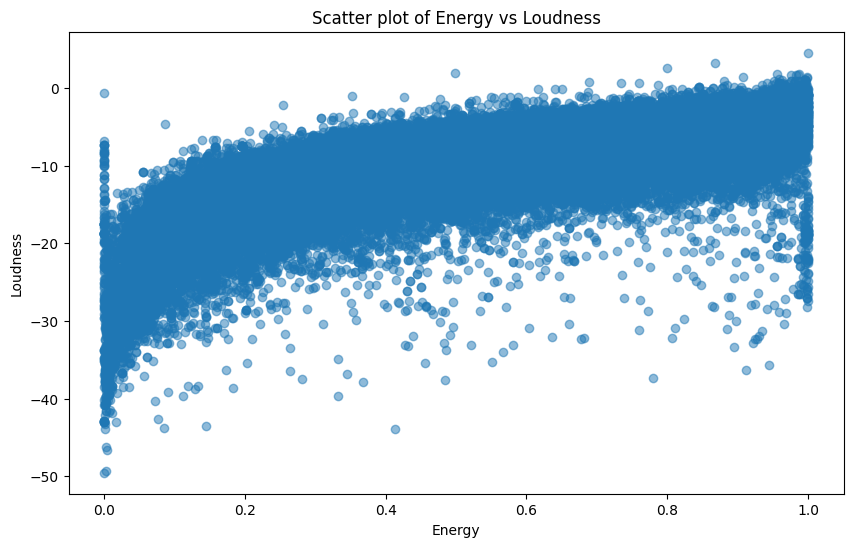

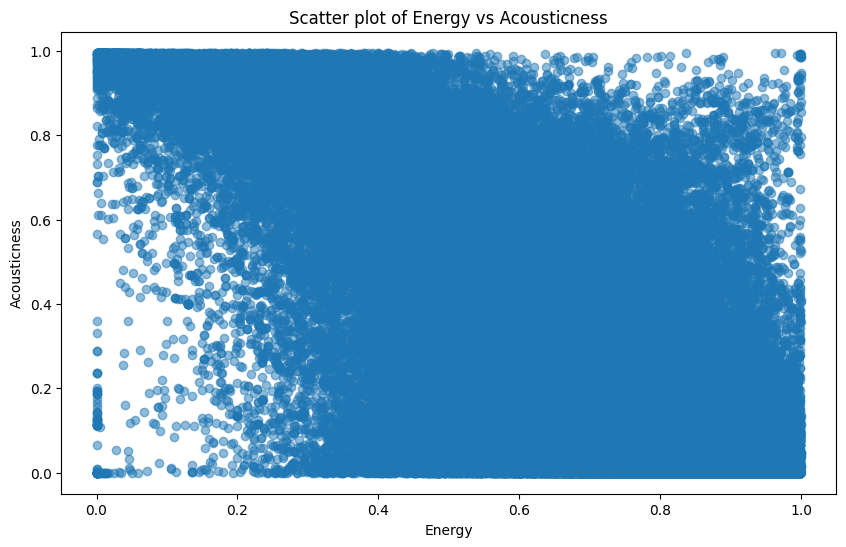

In [76]:
# Scatter plot for energy vs loudness
plt.figure(figsize=(10,6))
plt.scatter(spotify_data['energy'], spotify_data['loudness'], alpha=0.5)
plt.title('Scatter plot of Energy vs Loudness')
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.show()

# Scatter plot for energy vs acousticness
plt.figure(figsize=(10,6))
plt.scatter(spotify_data['energy'], spotify_data['acousticness'], alpha=0.5)
plt.title('Scatter plot of Energy vs Acousticness')
plt.xlabel('Energy')
plt.ylabel('Acousticness')
plt.show()

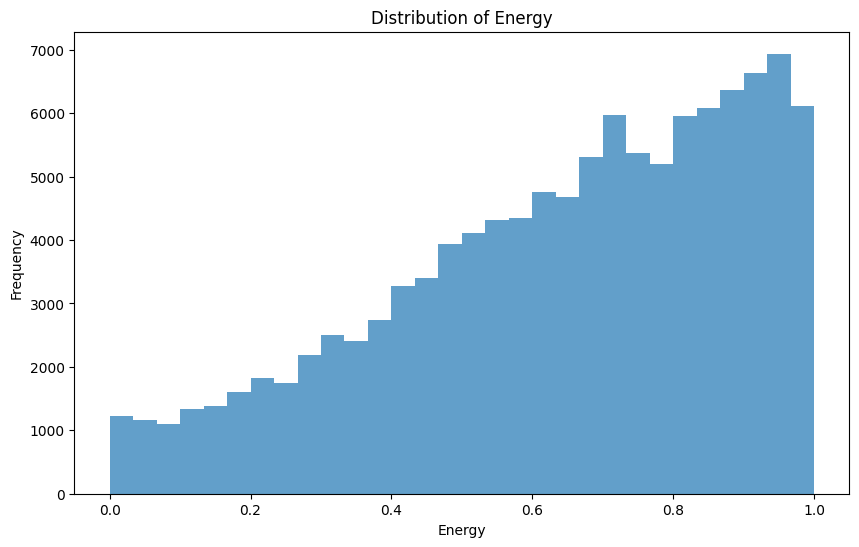

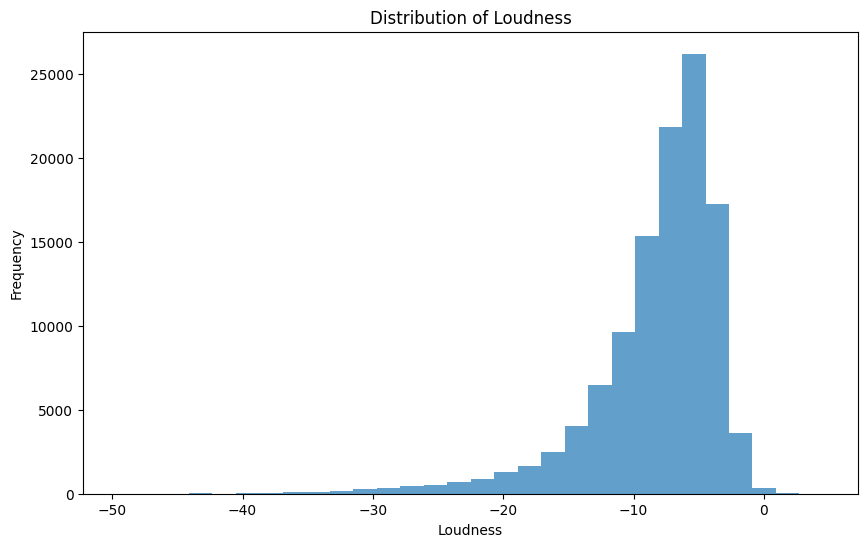

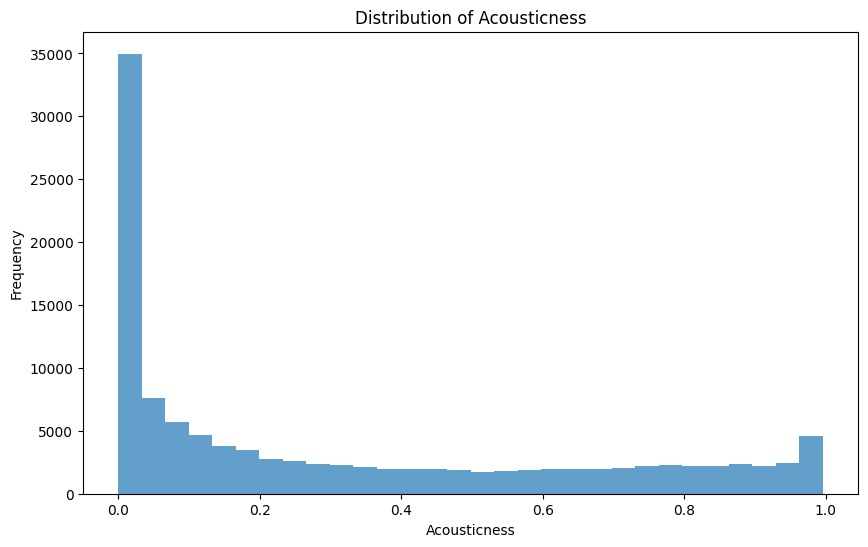

In [77]:
plt.figure(figsize=(10,6))
plt.hist(spotify_data['energy'], bins=30, alpha=0.7)
plt.title('Distribution of Energy')
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.show()

# Histogram for Loudness
plt.figure(figsize=(10,6))
plt.hist(spotify_data['loudness'], bins=30, alpha=0.7)
plt.title('Distribution of Loudness')
plt.xlabel('Loudness')
plt.ylabel('Frequency')
plt.show()

# Histogram for Acousticness
plt.figure(figsize=(10,6))
plt.hist(spotify_data['acousticness'], bins=30, alpha=0.7)
plt.title('Distribution of Acousticness')
plt.xlabel('Acousticness')
plt.ylabel('Frequency')
plt.show()

# Create regression model
For project check in 3, we built a model with response variable as `energy` and a single predictor as `loudness` from the dataset.

In [78]:
# Keep only the loudness and energy columns of the dataset
regression_data = spotify_data_cleaned[["loudness", "energy"]]
regression_data

loudness  energy
0         -6.746  0.4610
1        -17.235  0.1660
2         -9.734  0.3590
3        -18.515  0.0596
4         -9.681  0.4430
...          ...     ...
113995   -16.393  0.2350
113996   -18.318  0.1170
113997   -10.895  0.3290
113998   -10.889  0.5060
113999   -10.204  0.4870

[113549 rows x 2 columns]

Split the data into 60% training, 20% validation, and 20% testing sets using sklearn's `train_test_split`.

In [79]:
from sklearn.model_selection import train_test_split

X = regression_data.drop(columns=['energy'])
y = regression_data['energy']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

Create a training and validation dataframe with just the `loudness` predictor column and `energy` response column.

In [80]:
train_df = X_train.copy()
train_df['energy'] = y_train
#train_df = train_df[['loudness', 'energy']]

val_df = X_val.copy()
val_df['energy'] = y_val
#val_df = val_df[['energy']]

Train the LS (L2 loss) model using LinearRegression

In [81]:
from sklearn.linear_model import LinearRegression

ls_fit = LinearRegression()
ls_fit.fit(X=np.array(train_df['loudness']).reshape(-1, 1),
           y=train_df['energy'])

LinearRegression()

# Overfitting and underfitting analysis

Create a scatterplot of energy vs the loudness predictor variable, and include the line from the LinearRegression model.

In [82]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(train_df, x='loudness', y='energy',
                 title='Loudness vs Energy with LS Fit')

fig.add_trace(
    go.Scattergl(x=train_df['loudness'],
               y=ls_fit.intercept_ + train_df['loudness'] * ls_fit.coef_[0],
               mode='lines',
               name='LS',
               line={'dash': 'solid', 'color': 'red'})
)

fig.update_yaxes(range=[-0.1, 1.1])
fig.show()

print(f"LS Model: Energy = {ls_fit.intercept_:.2f} + {ls_fit.coef_[0]:.2f} * Loudness")

LS Model: Energy = 0.96 + 0.04 * Loudness


Our model seems to be underfitting our data. In particular it seems that our data more closely follows some polynomial curve.

# Training Performance

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Evaluation metrics on full dataset

In [84]:
pred_train_df = pd.DataFrame(
    {'true': regression_data['energy'],
     'ls_pred': ls_fit.predict(np.array(regression_data['loudness']).reshape(-1,1))
    }
)

In [85]:
print('LS rMSE:', np.sqrt(mean_squared_error(pred_train_df['true'], pred_train_df['ls_pred'])))
print('LS MAE:', mean_absolute_error(pred_train_df['true'], pred_train_df['ls_pred']))
print('LS MAD:', np.median(np.abs(pred_train_df['true'] - pred_train_df['ls_pred'])))
print('LS correlation:', np.corrcoef(pred_train_df['true'], pred_train_df['ls_pred'])[0,1])
print('LS R2:', r2_score(pred_train_df['true'], pred_train_df['ls_pred']))


LS rMSE: 0.16298146738328476
LS MAE: 0.13032025710027256
LS MAD: 0.11436304179326895
LS correlation: 0.760624379532019
LS R2: 0.5785476651682689


Evaluation metrics on training and validation sets separately

In [86]:
# predictions on training set
train_pred = ls_fit.predict(np.array(train_df['loudness']).reshape(-1, 1))
print('Training rMSE:', np.sqrt(mean_squared_error(train_df['energy'], train_pred)))
print('Training MAE:', mean_absolute_error(train_df['energy'], train_pred))
print('Training MAD:', np.median(np.abs(train_df['energy'] - train_pred)))
print('Training correlation:', np.corrcoef(train_df['energy'], train_pred)[0, 1])
print('Training R2:', r2_score(train_df['energy'], train_pred))

# predictions on validation set
val_pred = ls_fit.predict(np.array(val_df['loudness']).reshape(-1, 1))
print('\nValidation rMSE:', np.sqrt(mean_squared_error(val_df['energy'], val_pred)))
print('Validation MAE:', mean_absolute_error(val_df['energy'], val_pred))
print('Validation MAD:', np.median(np.abs(val_df['energy'] - val_pred)))
print('Validation correlation:', np.corrcoef(val_df['energy'], val_pred)[0, 1])
print('Validation R2:', r2_score(val_df['energy'], val_pred))

Training rMSE: 0.1628749413886862
Training MAE: 0.130491750134829
Training MAD: 0.11474916958021042
Training correlation: 0.759946403942324
Training R2: 0.5775185368648704

Validation rMSE: 0.1640883805108102
Validation MAE: 0.13053074624254069
Validation MAD: 0.11424488271778033
Validation correlation: 0.7591855127309678
Validation R2: 0.5763156598450415


# Regularization

In [87]:
from sklearn.linear_model import  Ridge, Lasso
from sklearn.model_selection import cross_val_score, cross_validate

Find standard deviation of our predictor (`loudness`)

In [88]:
X_std = (X - X.mean()) / X.std()

Use 10-fold cross-validation to determine the best value for alpha (lambda) for our lasso regression model

In [89]:
# alpha test values
alphas = np.logspace(-8, 1, 100)

# cross-validation scores
lasso_cv_scores = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso_cv = cross_validate(estimator=lasso,
                              X=X_std,
                              y=y,
                              cv=10,
                              scoring='neg_root_mean_squared_error')
    lasso_cv_scores.append({'alpha': alpha,
                            'log_alpha': np.log(alpha),
                            'mse': -np.mean(lasso_cv['test_score'])})

Plot cross-validation scores vs. alpha

In [90]:
lasso_cv_scores_df = pd.DataFrame(lasso_cv_scores)

px.line(lasso_cv_scores_df,
        x='log_alpha',
        y='mse',
        title='Lasso Alpha Values vs. MSE')

Find the alpha which minimizes MSE and the alpha within 1 standard error

In [91]:
# find alpha with min MSE
lasso_min = lasso_cv_scores_df.sort_values(by='mse').head(1)
lasso_alpha_min = lasso_min.alpha.values[0]

# find standard error and min of MSE
lasso_mse_se = lasso_cv_scores_df['mse'].std() / np.sqrt(100)
lasso_mse_min = lasso_min.mse.values[0]

# find alpha value within 1 standard error
lasso_alpha_1se = lasso_cv_scores_df[(lasso_cv_scores_df['mse'] <= lasso_mse_min + lasso_mse_se) &
                                     (lasso_cv_scores_df['mse'] >= lasso_mse_min - lasso_mse_se)].sort_values(by='alpha', ascending=False).head(1).alpha.values[0]

In [92]:
print('Lasso (min): ', lasso_alpha_min)
print('Lasso (1SE): ', lasso_alpha_1se)

Lasso (min):  1e-08
Lasso (1SE):  0.028480358684358047


Plot lasso regression models

In [93]:
lasso_min_fit = Lasso(alpha=lasso_alpha_min).fit(X=X, y=y)
lasso_1se_fit = Lasso(alpha=lasso_alpha_1se).fit(X=X, y=y)

In [94]:
fig = px.scatter(train_df, x='loudness', y='energy',
                 title='Loudness vs Energy with Lasso Regression')

fig.add_trace(
    go.Scattergl(x=train_df['loudness'],
               y=lasso_min_fit.intercept_ + train_df['loudness'] * lasso_min_fit.coef_[0],
               mode='lines',
               name='Min MSE',
               line={'dash': 'solid', 'color': 'red'})
)

fig.add_trace(
    go.Scattergl(x=train_df['loudness'],
               y=lasso_1se_fit.intercept_ + train_df['loudness'] * lasso_1se_fit.coef_[0],
               mode='lines',
               name='1 SE',
               line={'dash': 'solid', 'color': 'orange'})
)

fig.update_yaxes(range=[-0.1, 1.1])
fig.show()

print(f"Min MSE: Energy = {lasso_min_fit.intercept_:.2f} + {lasso_min_fit.coef_[0]:.2f} * Loudness")
print(f"   1 SE: Energy = {lasso_1se_fit.intercept_:.2f} + {lasso_1se_fit.coef_[0]:.2f} * Loudness")

Min MSE: Energy = 0.96 + 0.04 * Loudness
   1 SE: Energy = 0.95 + 0.04 * Loudness


From this, we see that our lasso regression is almost exactly the same as our initial linear regression. This means that for our data set, using lasso regularization may not be necessary as it has little effect on our regression model.

# Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression

Create dataframe with our chosen response (`explicit`) and predictor (`speechiness`) variables.

In [96]:
logistic_data = spotify_data_cleaned[['explicit', 'speechiness']]

Split into training and validation sets.

In [97]:
X = logistic_data.drop(columns='explicit')
y = logistic_data['explicit']

lr_X_train, lr_X_val, lr_y_train, lr_y_val = train_test_split(X, y, train_size=0.75, random_state=2003)

Fit the logistic regression and print its intercept and coefficients.

In [98]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X=lr_X_train,
           y=lr_y_train)
print(f"LR Intercept: {lr.intercept_}  LR Coefficients: {lr.coef_}")

LR Intercept: [-3.00000206]  LR Coefficients: [[5.65610183]]


Evaluate the accuracy of our model on the validation set.

In [99]:
pred_val_sample = pd.DataFrame(dict(
    explicit = lr_y_val,
    lr_predict = lr.predict_proba(lr_X_val)[:,1],
    lr_predict_binary = lr.predict(lr_X_val)))
pred_val_sample

explicit  lr_predict  lr_predict_binary
87547      False    0.061606              False
107005     False    0.056971              False
95871      False    0.056971              False
22880       True    0.114075              False
38035      False    0.068011              False
...          ...         ...                ...
51857      False    0.078435              False
96888      False    0.066415              False
89607       True    0.071723              False
467        False    0.057735              False
88536      False    0.070490              False

[28388 rows x 3 columns]

In [100]:
from sklearn import metrics

In [101]:
conf_matrix = metrics.confusion_matrix(y_true=lr_y_val, y_pred=lr.predict(lr_X_val))
conf_matrix

array([[25777,   118],
       [ 2342,   151]])

Prediction accuracy

In [102]:
accuracy = metrics.accuracy_score(y_true=lr_y_val, y_pred=lr.predict(lr_X_val))
accuracy

0.9133436663378892

Prediction error

In [103]:
prediction_error = 1 - accuracy
prediction_error

0.08665633366211078

True positive rate

In [104]:
true_positive_rate = metrics.recall_score(y_true=lr_y_val, y_pred=lr.predict(lr_X_val))
true_positive_rate

0.060569594865623744

True negative rate

In [105]:
true_negative_rate = metrics.recall_score(y_true=lr_y_val, y_pred=lr.predict(lr_X_val), pos_label=0)
true_negative_rate

0.9954431357404905

In [106]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [107]:
lr_fpr_sample, lr_tpr_sample, lr_thresholds_sample = metrics.roc_curve(pred_val_sample['explicit'], pred_val_sample['lr_predict'])

In [108]:
roc_lr_sample = pd.DataFrame({
    'False Positive Rate': lr_fpr_sample,
    'True Positive Rate': lr_tpr_sample,
    'Model': 'Logistic Regression'
}, index=lr_thresholds_sample)

roc_sample_df = pd.concat([roc_lr_sample])

fig = px.line(roc_sample_df, y='True Positive Rate', x='False Positive Rate',
              color='Model', width=700, height=500)
fig.show()

In [109]:
lr_auc_sample = metrics.roc_auc_score(pred_val_sample['explicit'], pred_val_sample['lr_predict'])
print(f'Logistic Regression AUC: {lr_auc_sample}')

Logistic Regression AUC: 0.7700485630861218


In [114]:
desired_tpr = 1
desired_fpr = 0

roc_sample_df['sqr_dist'] = (desired_tpr - roc_sample_df['True Positive Rate'])**2 + (desired_fpr - roc_sample_df['False Positive Rate'])**2
roc_sample_df.sort_values(by='sqr_dist')

False Positive Rate  True Positive Rate                Model  \
0.068587             0.283568            0.694745  Logistic Regression   
0.068263             0.288589            0.699158  Logistic Regression   
0.068191             0.289902            0.700361  Logistic Regression   
0.068551             0.283993            0.694745  Logistic Regression   
0.068334             0.287430            0.697954  Logistic Regression   
...                       ...                 ...                  ...   
0.053460             0.998687            1.000000  Logistic Regression   
0.919076             0.000039            0.001203  Logistic Regression   
0.919913             0.000039            0.000401  Logistic Regression   
inf                  0.000000            0.000000  Logistic Regression   
0.047426             1.000000            1.000000  Logistic Regression   

          sqr_dist  
0.068587  0.173591  
0.068263  0.173789  
0.068191  0.173826  
0.068551  0.173832  
0.068334  0.173848  
...            ...  
0.053460  0.997376  
0.919076  0.997595  
0.919913  0.999198  
inf       1.000000  
0.047426  1.000000  

[1268 rows x 4 columns]

In [ ]:
X = pred_val_sample.drop(columns='explicit')
y = pred_val_sample['explicit']
cross_val_score(lr, X, y, cv=5, scoring='roc_auc')

In [ ]:
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_index, test_index in skfolds.split(X, y):
    clone_lr = clone(lr)
    X_train_folds = X.iloc[train_index]
    y_train_folds = y.iloc[train_index]
    X_test_fold = X.iloc[test_index]
    print(test_index)
    clone_lr.fit(X_train_folds, y_train_folds)
    y_pred = clone_lr.predict(X_test_fold)

    auc_sample = metrics.roc_auc_score(y.iloc[test_index], y_pred)
    print('Fold: ', i)
    print('AUC: ', auc_sample)
    print('Accuracy: ', metrics.accuracy_score(y.iloc[test_index], y_pred))
    i += 1